<a href="https://colab.research.google.com/github/i-akash/Data-science/blob/master/practice/Linear_Regression_for_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sn
from   sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

%matplotlib inline

In [0]:
dataset=pd.read_csv('drive/My Drive/ds dataset/Weather.csv')
dataset.describe()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


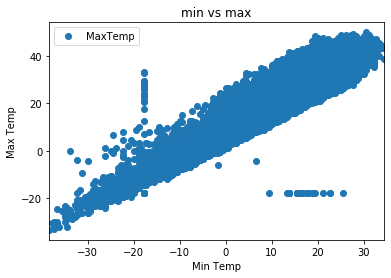

In [0]:
dataset.plot(x="MinTemp",y="MaxTemp",style="o")
plt.title("min vs max")
plt.xlabel("Min Temp")
plt.ylabel("Max Temp")
plt.show()

In [0]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sn.distplot(dataset["MaxTemp"])

In [0]:
X=dataset['MaxTemp'].values.reshape(-1,1) 
Y=dataset['MinTemp'].values.reshape(-1,1)
X

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [0]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
intercepts=linear_regression.intercept_
coef=linear_regression.coef_

print(intercepts,coef)

[-4.90516325] [[0.83956109]]


In [0]:
y_predict=linear_regression.predict(x_test)

comp_df=pd.DataFrame({'actual':y_test.flatten(),'predicted':y_predict.flatten()})
comp_df

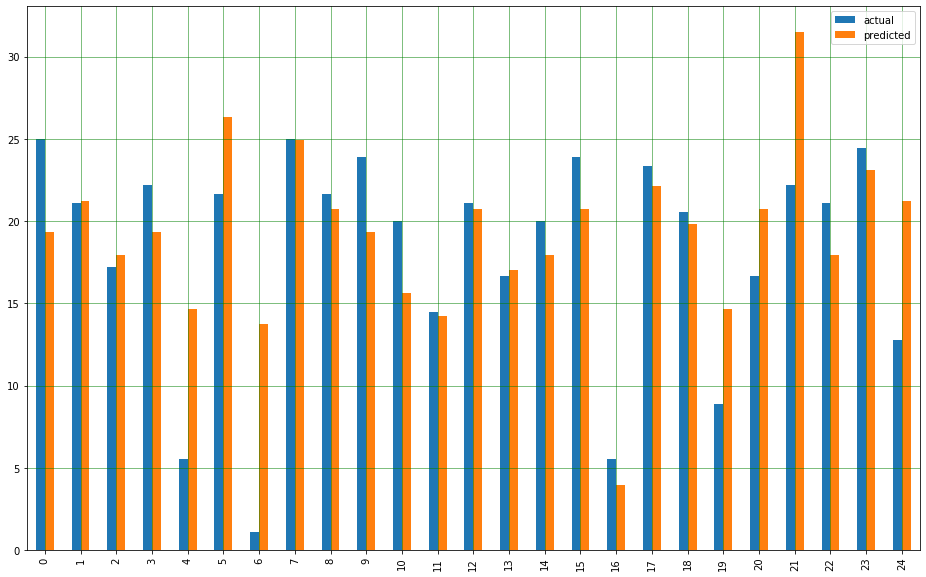

In [0]:
df=comp_df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

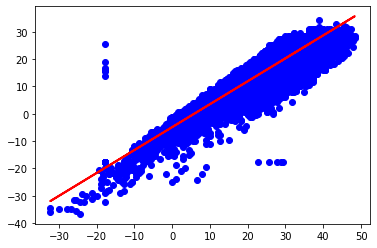

In [0]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_predict,color='red',linewidth='2')

In [0]:
# performance
print("mean absolute error: ",metrics.mean_absolute_error(y_test,y_predict))
print("mean squared error: ",metrics.mean_squared_error(y_test,y_predict))
print("root mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

mean absolute error:  3.1367056440832783
mean squared error:  16.23798924029209
root mean squared error:  4.02963884737728
